# 💻 Laptop Price Analysis & Prediction

## 📌 Project Objective
To analyze laptop specifications and build a Machine Learning model to predict laptop prices.

## 🛠 Tools Used
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn

## 📂 Dataset
Laptop Prices Dataset (1275 rows, 23 columns)

## 📥 Importing Required Libraries

In [2]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")

## 📂 Loading the Dataset

In [1]:
import pandas as pd

data = pd.read_csv("laptop_prices.csv")
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


## 🔍 Basic Data Information

In [3]:
data.shape

(1275, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [5]:
data.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

## 📊 Statistical Summary

In [6]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


## 📈 Univariate Analysis

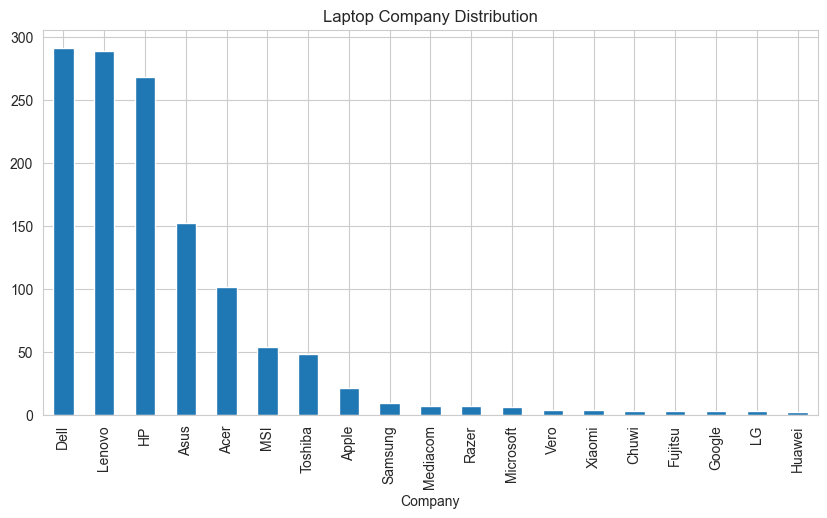

In [7]:
plt.figure(figsize=(10,5))
data['Company'].value_counts().plot(kind='bar')
plt.title("Laptop Company Distribution")
plt.show()

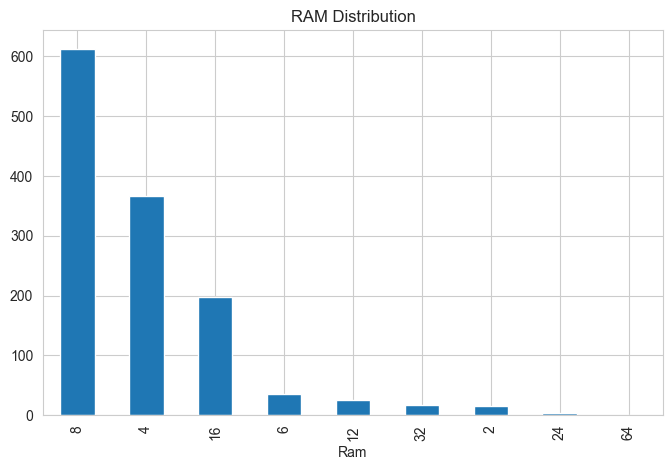

In [8]:
plt.figure(figsize=(8,5))
data['Ram'].value_counts().plot(kind='bar')
plt.title("RAM Distribution")
plt.show()

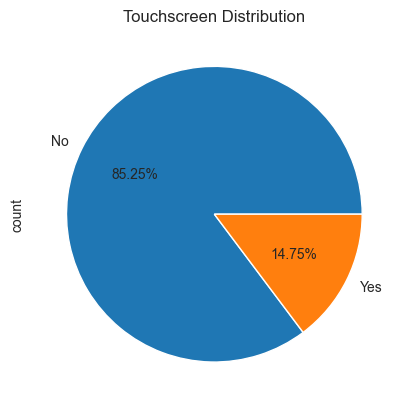

In [9]:
data['Touchscreen'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title("Touchscreen Distribution")
plt.show()

## 📉 Bivariate Analysis

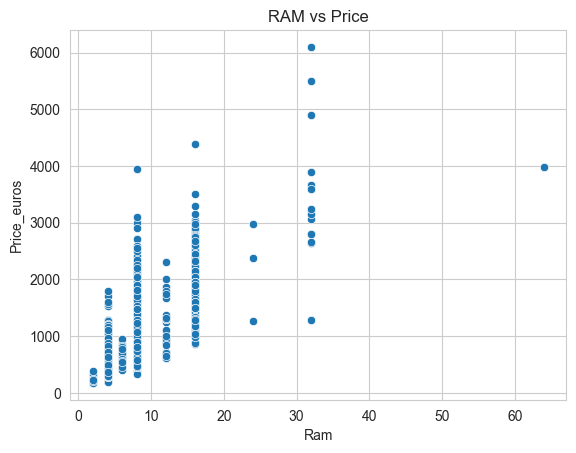

In [10]:
sns.scatterplot(x='Ram', y='Price_euros', data=data)
plt.title("RAM vs Price")
plt.show()

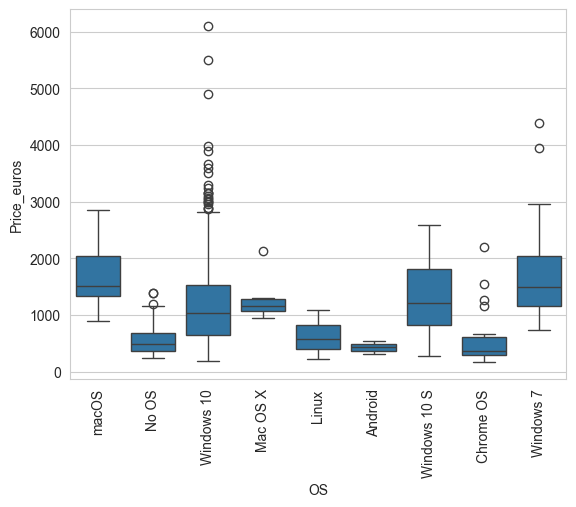

In [11]:
sns.boxplot(x='OS', y='Price_euros', data=data)
plt.xticks(rotation=90)
plt.show()

## ⚙️ Data Preprocessing

- Removing unnecessary columns  
- Converting categorical variables into numerical format  
- Preparing data for Machine Learning

In [12]:
data = data.drop(['Product'], axis=1)
data.head()

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


## 🔄 Encoding Categorical Variables

Using One-Hot Encoding to convert object columns into numerical format.

In [14]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,True,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,True,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,True,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,True,...,False,False,False,False,False,False,False,False,False,False


## 🎯 Defining Features (X) and Target (y)

In [15]:
X = data_encoded.drop('Price_euros', axis=1)
y = data_encoded['Price_euros']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (1275, 257)
Target shape: (1275,)


## 🔀 Splitting Data into Training and Testing Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (1020, 257)
Testing data: (255, 257)


## 🤖 Training Linear Regression Model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 🔮 Making Predictions

In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

array([ 475.05873977,  626.54242046, 1542.97319663,  979.76123917,
       1577.49526547])

## 📊 Model Evaluation
Using:
- Mean Squared Error (MSE)
- R² Score

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2981403.9359232187
R2 Score: -5.0067862598649455


## 📈 Actual vs Predicted Prices

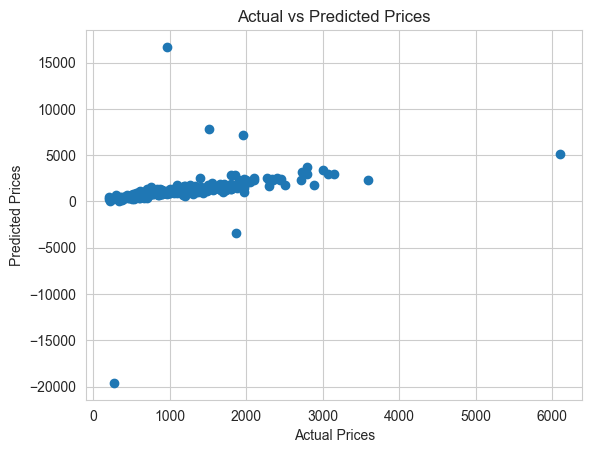

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

## ✅ Project Conclusion

- Performed Exploratory Data Analysis (EDA)
- Encoded categorical variables
- Built Linear Regression Model
- Evaluated model using MSE & R²
- Successfully predicted laptop prices

### 🚀 Future Improvements
- Try Random Forest
- Try XGBoost
- Feature Engineering

## ⚙️ Improved Feature Selection
Selecting only important columns for better prediction.

In [21]:
# Selecting useful columns only
selected_cols = [
    'Inches', 'Ram', 'Weight', 'CPU_freq',
    'PrimaryStorage', 'SecondaryStorage',
    'ScreenW', 'ScreenH'
]

X = data[selected_cols]
y = data['Price_euros']

X.head()

,Inches,Ram,Weight,CPU_freq,PrimaryStorage,SecondaryStorage,ScreenW,ScreenH
0,13.3,8,1.37,2.3,128,0,2560,1600
1,13.3,8,1.34,1.8,128,0,1440,900
2,15.6,8,1.86,2.5,256,0,1920,1080
3,15.4,16,1.83,2.7,512,0,2880,1800
4,13.3,8,1.37,3.1,256,0,2560,1600


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

print("New R2 Score:", r2_score(y_test, y_pred))

New R2 Score: 0.6970590637027155


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest R2: 0.8235031897163821


## 🤖 Final Model - Random Forest Regressor

After comparing models, Random Forest gave better accuracy.

### 📊 Model Performance:
- R² Score: 0.82
- Model explains 82% variance in laptop prices.

Random Forest performed better than Linear Regression for this dataset.

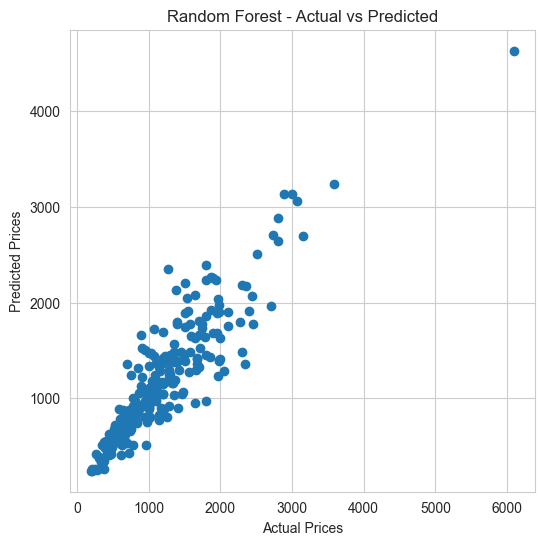

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest - Actual vs Predicted")
plt.show()